Intro to Data Science Assignmnet 1
<br> Name -> Muhammad Mehroz <br> Reg # -> FA20-BSE-071 <br> Section -> B <br> website link "https://en.wikipedia.org/wiki/List_of_best-selling_books"

Importing the libraries 

In [1]:
import matplotlib.pyplot as plt  
import pandas as pd 
import requests
from bs4 import BeautifulSoup as bs
import seaborn as sns

Feteching the main URL

In [2]:
url_of_wikipida  = "https://en.wikipedia.org/wiki/List_of_best-selling_books"
getting_url = requests.get(url_of_wikipida).text # requesting the webpage and getting the text of html  

Feeding the HTML to beautifulSoup

In [3]:
so = bs(getting_url) # parsing the html for data gathering


Finding the Table 

In [4]:
tab  = so.find_all("tbody") #  finding all the tbody tags and then the table
tab

[<tbody><tr>
 <th>Book</th>
 <th>Author(s)</th>
 <th>Original language</th>
 <th>First published</th>
 <th>Approximate sales
 </th>
 <th>Genre
 </th></tr>
 <tr>
 <td><i><a href="/wiki/Don_Quixote" title="Don Quixote">Don Quixote</a></i>
 </td>
 <td><a href="/wiki/Miguel_de_Cervantes" title="Miguel de Cervantes">Miguel de Cervantes</a>
 </td>
 <td>Spanish
 </td>
 <td>1605 (1st Part),
 <p>1615 (2nd Part)
 </p>
 </td>
 <td>500 million<sup class="reference" id="cite_ref-FoxBusiness2020_17-0"><a href="#cite_note-FoxBusiness2020-17">[17]</a></sup>
 </td>
 <td><a href="/wiki/Adventure_fiction" title="Adventure fiction">Adventure Fiction</a>
 </td></tr>
 <tr>
 <td><i><a href="/wiki/A_Tale_of_Two_Cities" title="A Tale of Two Cities">A Tale of Two Cities</a></i></td>
 <td><a href="/wiki/Charles_Dickens" title="Charles Dickens">Charles Dickens</a></td>
 <td>English</td>
 <td>1859</td>
 <td>200 million<sup class="reference" id="cite_ref-18"><a href="#cite_note-18">[18]</a></sup><sup class="noprint

In [5]:
#Fetching the Data From Each table

# main list of the books
top_99_books = []


# form table 1
table1 = tab[0].find_all('tr') # then all the rows of first columns
for r in table1[1:]:
    t1 = r.find_all('td')
    t2 = [e.text.strip() for e in t1]
    top_99_books.append([e for e in t2 if e])


# form table 2
table2 = tab[1].find_all('tr')
for r in table2[1:]:
    t1 = r.find_all('td')
    t2 = [ele.text.strip() for ele in t1]
    top_99_books.append([e for e in t2 if e])

# form table 3 
table3 = tab[2].find_all('tr')
t2 = []
for r in table3[1:68]:
    t1 = r.find_all('td')
    t2 = [ele.text.strip() for ele in t1]
    top_99_books.append([e for e in t2 if e])

print("------------------------------------ Fetched Data------------------------------------")


------------------------------------ Fetched Data------------------------------------


Storing the Data in the DataFrame

In [6]:
da = pd.DataFrame(top_99_books,columns= ['Book_Name','Author',"Language","Publish Date","No_of_copies_in_millions","Gener"])
da 

,Book_Name,Author,Language,Publish Date,No_of_copies_in_millions,Gener
0,A Tale of Two Cities,Charles Dickens,English,1859,200 million[19][circular reporting?],Historical fiction
1,The Little Prince,Antoine de Saint-Exupéry,French,1943,200 million[20][21],Novella
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120 million[22][23],Fantasy
3,And Then There Were None,Agatha Christie,English,1939,100 million[24],Mystery
4,Dream of the Red Chamber,Cao Xueqin,Chinese,1791,100 million[25][26],Family saga
...,...,...,...,...,...,...
95,"The Secret Diary of Adrian Mole, Aged 13¾",Sue Townsend,English,1982,20 million[116],Young adult novel
96,Pride and Prejudice,Jane Austen,English,1813,20 million[117][118],"Classic regency novel, romance"
97,Kon-Tiki: Across the Pacific in a Raft (Kon-Ti...,Thor Heyerdahl,Norwegian,1950,20 million[119],Travel literature
98,The Good Soldier Švejk (Osudy dobrého vojáka Š...,Jaroslav Hašek,Czech,1923,20 million (printed)[120],Unfinished satirical dark comedy novel


Using regx for converting string to digit for the number of copies column

In [8]:
da["No_of_copies_in_millions"] = da["No_of_copies_in_millions"].str.extract(r'(\d+\.?\d*)', expand=False)

Finding the link of each book 

In [10]:
links_of_books = [] # storing the links in the list 
for i in so.select("td:nth-of-type(1) a")[1:101]: # as we want 100 book so i have specified the number of rows, it means the from 1st column fetech the link 
    links_of_books.append("https://en.wikipedia.org"+i['href'])

links_of_books

['https://en.wikipedia.org/wiki/The_Little_Prince',
 'https://en.wikipedia.org/wiki/Harry_Potter_and_the_Philosopher%27s_Stone',
 'https://en.wikipedia.org/wiki/And_Then_There_Were_None',
 'https://en.wikipedia.org/wiki/Dream_of_the_Red_Chamber',
 'https://en.wikipedia.org/wiki/The_Hobbit',
 'https://en.wikipedia.org/wiki/The_Lion,_the_Witch_and_the_Wardrobe',
 'https://en.wikipedia.org/wiki/She:_A_History_of_Adventure',
 'https://en.wikipedia.org/wiki/Vardi_Wala_Gunda',
 'https://en.wikipedia.org/wiki/The_Da_Vinci_Code',
 'https://en.wikipedia.org/wiki/Harry_Potter_and_the_Chamber_of_Secrets',
 'https://en.wikipedia.org/wiki/Harry_Potter_and_the_Prisoner_of_Azkaban',
 'https://en.wikipedia.org/wiki/Harry_Potter_and_the_Goblet_of_Fire',
 'https://en.wikipedia.org/wiki/Harry_Potter_and_the_Order_of_the_Phoenix',
 'https://en.wikipedia.org/wiki/Harry_Potter_and_the_Half-Blood_Prince',
 'https://en.wikipedia.org/wiki/Harry_Potter_and_the_Deathly_Hallows',
 'https://en.wikipedia.org/wiki/T


Navigating to the books link <br>
requesting each book link and then fetech some lines from that book page


In [11]:
some_info_of_book = []
for i in links_of_books:
    r = requests.get(i).text
    b = bs(r)
    x = " "
    for t in b.find_all('p'):
            x = t.text
    some_info_of_book.append([x])
    
print(some_info_of_book)


[['Since 2020, June 29 is International Little Prince Day. This date was chosen to commemorate the birth of Antoine de Saint-Exupéry, which occurred on June 29, 1900. The Antoine de Saint-Exupéry Foundation started the initiative striving to promote the humanist values \u200b\u200bcarried by the book published in 1943. Mark Osborne was one of the first personalities to participate in the Little Prince Day 2020.[159]\n'], ['Stephen Brown noted that the early Harry Potter books, especially Harry Potter and the Philosopher\'s Stone, were a runaway success despite inadequate and poorly organised marketing. Brown advised marketing executives to be less preoccupied with rigorous statistical analyses and the "analysis, planning, implementation, and control" model of management. Instead he recommended that they should treat the stories as "a marketing masterclass", full of enticing products and brand names.[52] For example, a real-world analogue of Bertie Bott\'s Every Flavour Beans was introd

Storing the Book info in the dataframe

In [12]:
da["Book Info"] = some_info_of_book
da

,Book_Name,Author,Language,Publish Date,No_of_copies_in_millions,Gener,Book Info
0,A Tale of Two Cities,Charles Dickens,English,1859,200,Historical fiction,"[Since 2020, June 29 is International Little P..."
1,The Little Prince,Antoine de Saint-Exupéry,French,1943,200,Novella,[Stephen Brown noted that the early Harry Pott...
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120,Fantasy,[The 2014 live action comedy-crime and murder ...
3,And Then There Were None,Agatha Christie,English,1939,100,Mystery,[An English-language opera based on the novel ...
4,Dream of the Red Chamber,Cao Xueqin,Chinese,1791,100,Family saga,[While reliable figures are difficult to obtai...
...,...,...,...,...,...,...,...
95,"The Secret Diary of Adrian Mole, Aged 13¾",Sue Townsend,English,1982,20,Young adult novel,"[In summer 2014, Udon Entertainment's Manga Cl..."
96,Pride and Prejudice,Jane Austen,English,1813,20,"Classic regency novel, romance",[This article about an anthropology-related bo...
97,Kon-Tiki: Across the Pacific in a Raft (Kon-Ti...,Thor Heyerdahl,Norwegian,1950,20,Travel literature,[The first translation by Paul Selver was heav...
98,The Good Soldier Švejk (Osudy dobrého vojáka Š...,Jaroslav Hašek,Czech,1923,20,Unfinished satirical dark comedy novel,"[In 2016, Alessia Cara released her second sin..."


In [13]:
# making a csv file of the dataframe
file_of_data = da.to_csv("DATA.csv")

Graph<br>
Bar Graph between no of copies of each book

first converting the no of copies column in float

In [14]:
l = da.No_of_copies_in_millions.values.tolist()
a  = []
for i in l:
    a.append(float(i)) # converting to the float


# feeding back to dataframe
da['No_of_copies_in_millions'] = a
da

,Book_Name,Author,Language,Publish Date,No_of_copies_in_millions,Gener,Book Info
0,A Tale of Two Cities,Charles Dickens,English,1859,200.0,Historical fiction,"[Since 2020, June 29 is International Little P..."
1,The Little Prince,Antoine de Saint-Exupéry,French,1943,200.0,Novella,[Stephen Brown noted that the early Harry Pott...
2,Harry Potter and the Philosopher's Stone,J. K. Rowling,English,1997,120.0,Fantasy,[The 2014 live action comedy-crime and murder ...
3,And Then There Were None,Agatha Christie,English,1939,100.0,Mystery,[An English-language opera based on the novel ...
4,Dream of the Red Chamber,Cao Xueqin,Chinese,1791,100.0,Family saga,[While reliable figures are difficult to obtai...
...,...,...,...,...,...,...,...
95,"The Secret Diary of Adrian Mole, Aged 13¾",Sue Townsend,English,1982,20.0,Young adult novel,"[In summer 2014, Udon Entertainment's Manga Cl..."
96,Pride and Prejudice,Jane Austen,English,1813,20.0,"Classic regency novel, romance",[This article about an anthropology-related bo...
97,Kon-Tiki: Across the Pacific in a Raft (Kon-Ti...,Thor Heyerdahl,Norwegian,1950,20.0,Travel literature,[The first translation by Paul Selver was heav...
98,The Good Soldier Švejk (Osudy dobrého vojáka Š...,Jaroslav Hašek,Czech,1923,20.0,Unfinished satirical dark comedy novel,"[In 2016, Alessia Cara released her second sin..."


Now it;s time for the graph

<function matplotlib.pyplot.show(close=None, block=None)>

c:\Users\dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 29436 (\N{CJK UNIFIED IDEOGRAPH-72FC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\dell\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 33150 (\N{CJK UNIFIED IDEOGRAPH-817E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


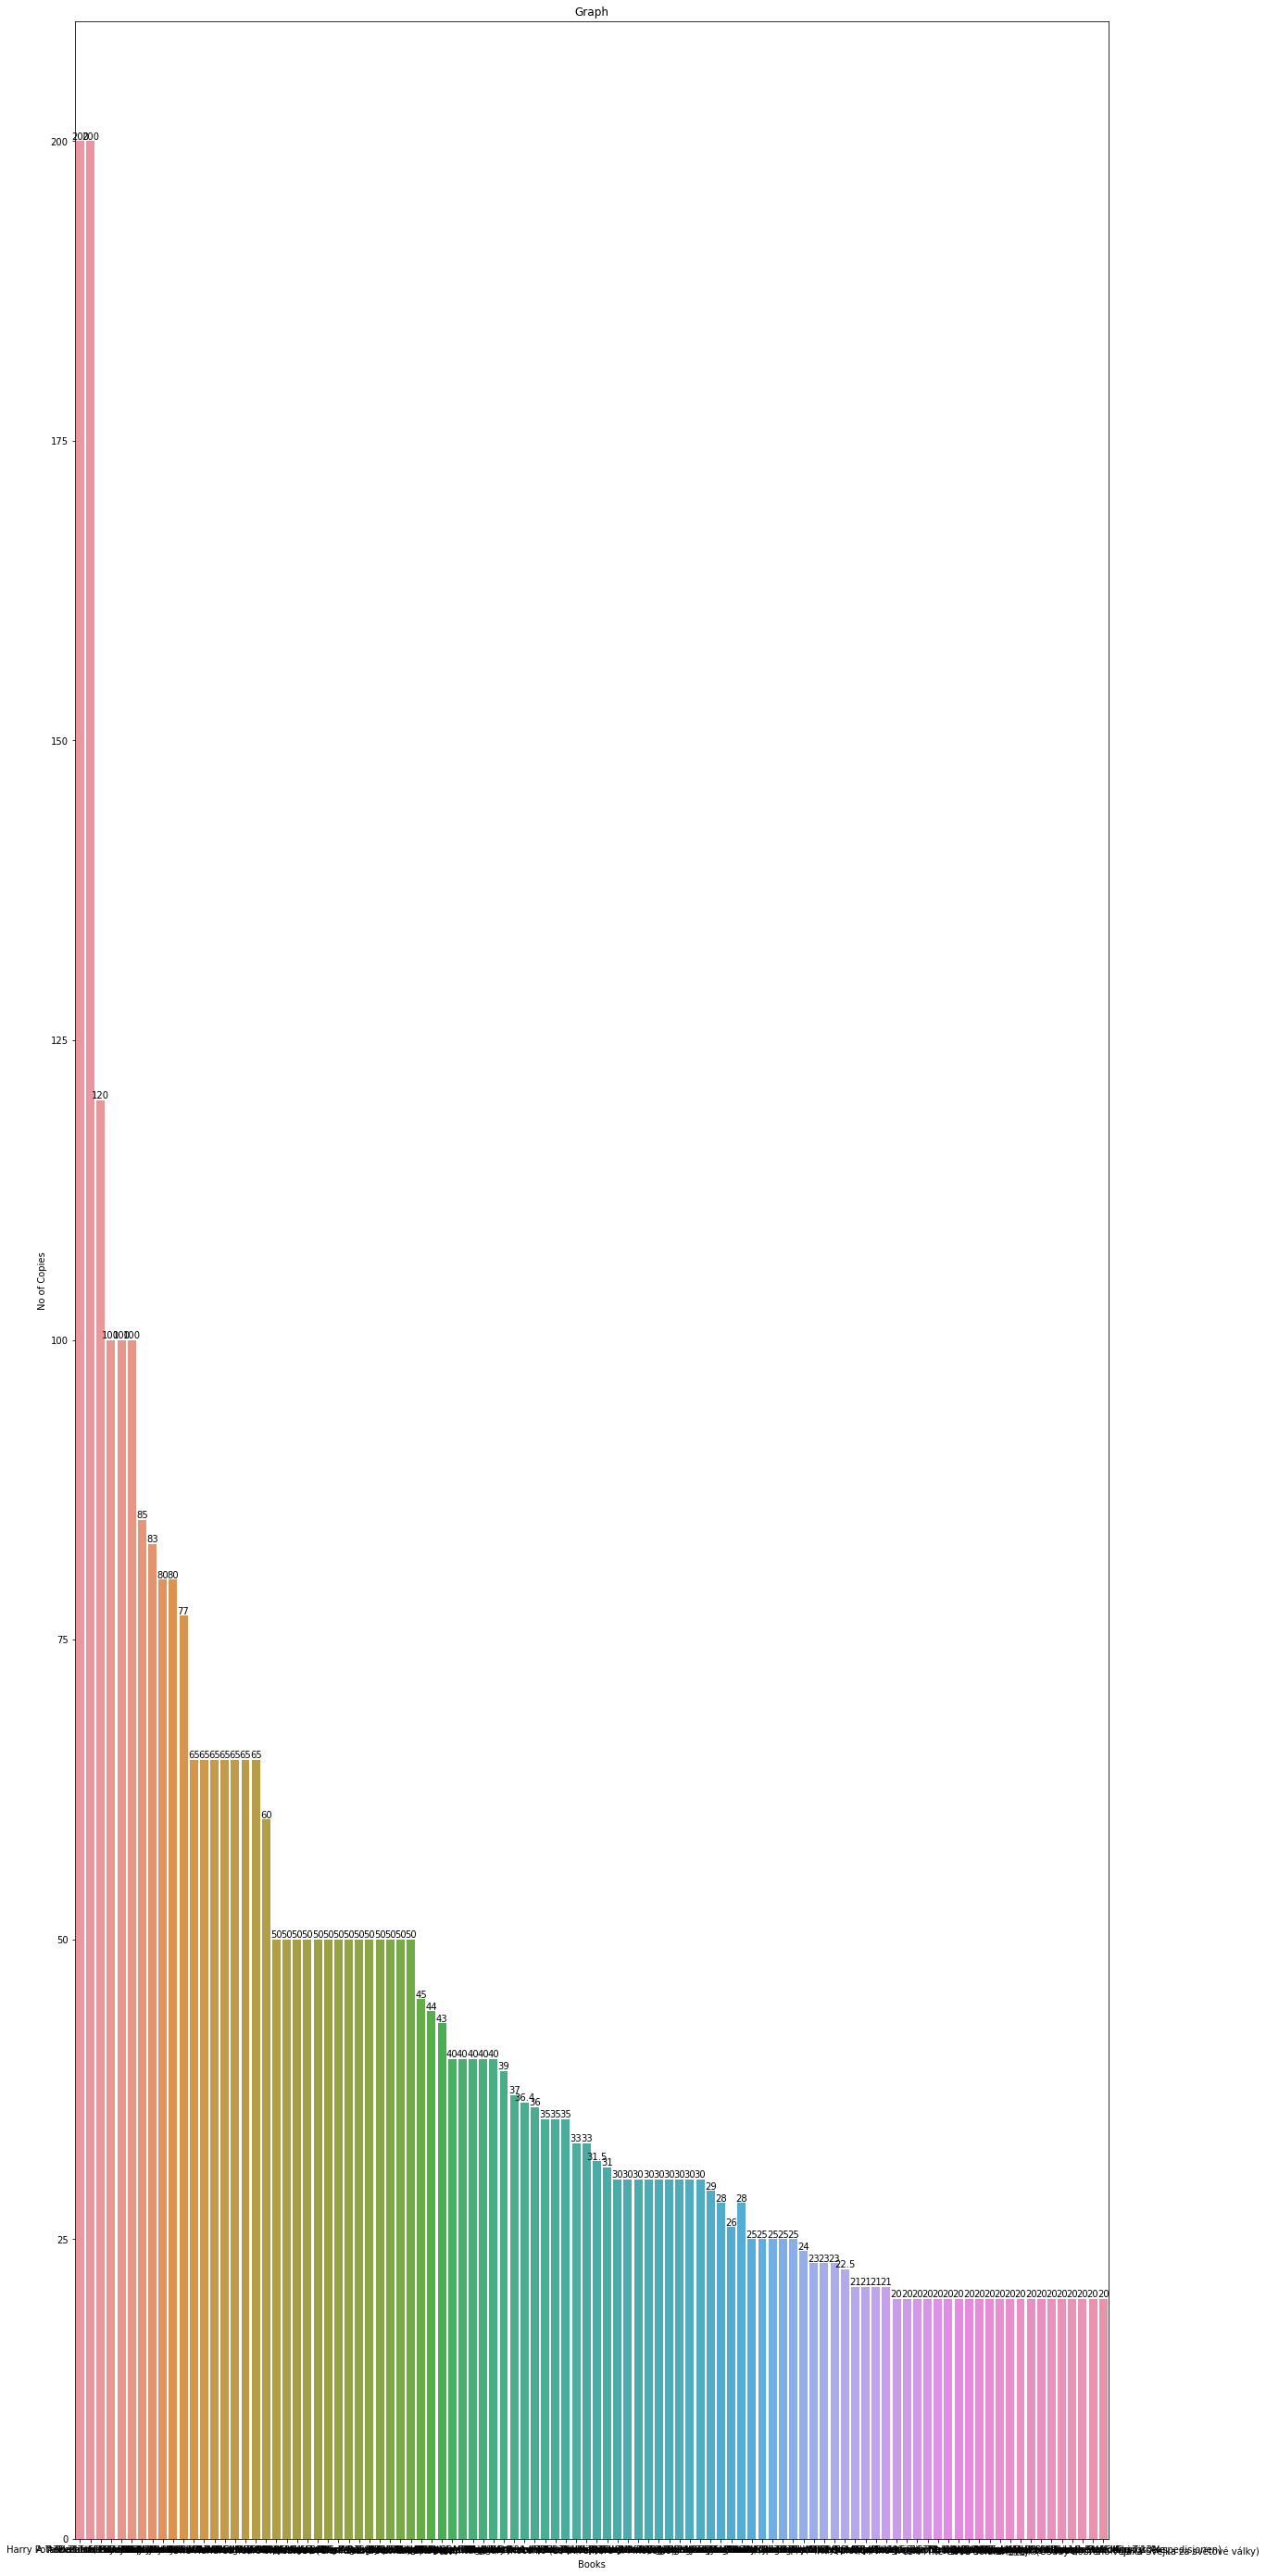

In [15]:
plt.figure(figsize=(20,50))
plt.title("Graph")
a = sns.barplot(x = da.Book_Name ,y = da.No_of_copies_in_millions ,data= da)
plt.xlabel("Books")
plt.ylabel("No of Copies")
for i in a.containers:
    a.bar_label(i)
plt.show